In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
raw_df = pd.read_csv("../data/heart_2020_cleaned.csv")
raw_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## EDA

In [3]:
raw_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
stroke = np.array(raw_df["Stroke"])
unique, counts = np.unique(stroke, return_counts=True)
print(np.column_stack((unique,counts)))

[['No' 307726]
 ['Yes' 12069]]


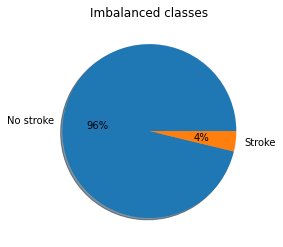

In [6]:
#create pie chart
plt.pie(counts, labels = ["No stroke", "Stroke"],  shadow= True, autopct='%.0f%%')
plt.title("Imbalanced classes")
plt.show()

## Remove the dominant class - Under-sampling the dataset

In [7]:
# Seperate df by class of stroke
stroke_df = raw_df.loc[raw_df.Stroke == "Yes"]
no_stroke_df = raw_df.loc[raw_df.Stroke == "No"]


In [8]:
# randomly select row from no stroke data frame to drop
np.random.seed(10)
remove_n = 307726-12069
remove_indices = np.random.choice(no_stroke_df.index, remove_n, replace = False)
reduced_no_stroke_df = no_stroke_df.drop(remove_indices)

# combine new no stroke df with stroke data frame
df = stroke_df.append(reduced_no_stroke_df)
df.sort_index(inplace= True)

In [9]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
22,No,26.17,Yes,No,No,0.0,15.0,No,Female,45-49,White,No,Yes,Very good,6.0,No,No,No
25,No,29.18,Yes,No,No,30.0,30.0,Yes,Female,60-64,White,No,No,Poor,6.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
40,No,22.60,Yes,No,Yes,0.0,10.0,No,Female,55-59,White,No,No,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319732,No,18.79,No,Yes,No,30.0,15.0,Yes,Male,55-59,Hispanic,No,No,Fair,6.0,Yes,No,No
319739,Yes,35.02,No,No,No,15.0,0.0,No,Male,60-64,Hispanic,Yes,Yes,Fair,8.0,No,Yes,No
319740,No,26.07,No,No,Yes,0.0,0.0,No,Female,60-64,Hispanic,No,No,Good,6.0,No,No,No
319765,Yes,38.45,No,No,Yes,30.0,15.0,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,6.0,Yes,No,No


In [10]:
stroke = np.array(df["Stroke"])
unique, counts = np.unique(stroke, return_counts=True)
print(np.column_stack((unique,counts)))

[['No' 12069]
 ['Yes' 12069]]


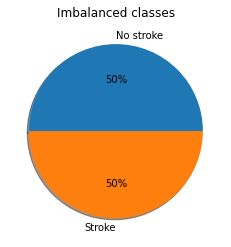

In [11]:
#create pie chart
plt.pie(counts, labels = ["No stroke", "Stroke"],  shadow= True, autopct='%.0f%%')
plt.title("Imbalanced classes")
plt.show()

In [12]:
bins = np.sort(df["AgeCategory"].unique())
bins

array(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
      dtype=object)

<AxesSubplot:xlabel='AgeCategory', ylabel='Count'>

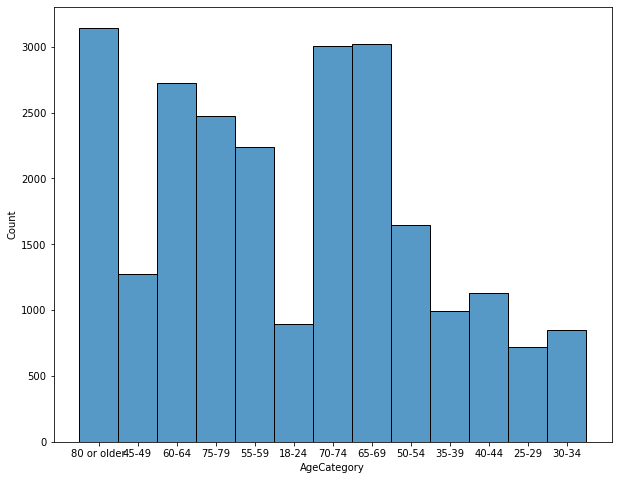

In [13]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
sns.histplot(df, x = "AgeCategory")


## Finding features of important

In [14]:
# setting up dependent variable
y = df["Stroke"]

In [15]:
# encoded target column heart disease
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)


In [16]:
# encode data
data = df.drop(["Stroke"], axis = 1)
X= pd.get_dummies(data)
X.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'HeartDisease_No',
       'HeartDisease_Yes', 'Smoking_No', 'Smoking_Yes', 'AlcoholDrinking_No',
       'AlcoholDrinking_Yes', 'DiffWalking_No', 'DiffWalking_Yes',
       'Sex_Female', 'Sex_Male', 'AgeCategory_18-24', 'AgeCategory_25-29',
       'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44',
       'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59',
       'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74',
       'AgeCategory_75-79', 'AgeCategory_80 or older',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_No',
       'PhysicalActivity_Yes', 'GenHealth_Excellent', 'GenHealth_Fair',
       'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good', 'Asthma_No',
       'Asthma_Yes'

In [17]:
# remove unnecessary columns
X = X.drop(["HeartDisease_No","Sex_Female","Smoking_No","AlcoholDrinking_No","DiffWalking_No","PhysicalActivity_No","Asthma_No","KidneyDisease_No","SkinCancer_No"],axis = 1)

In [18]:
# Store column names
feature_names = X.columns
feature_names

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
       'HeartDisease_Yes', 'Smoking_Yes', 'AlcoholDrinking_Yes',
       'DiffWalking_Yes', 'Sex_Male', 'AgeCategory_18-24', 'AgeCategory_25-29',
       'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44',
       'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59',
       'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74',
       'AgeCategory_75-79', 'AgeCategory_80 or older',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_Yes',
       'GenHealth_Excellent', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good', 'Asthma_Yes',
       'KidneyDisease_Yes', 'SkinCancer_Yes'],
      dtype='object')

In [19]:
# split data into training and testing portion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50) 
rf = rf.fit(X_train,y_train)


In [21]:
# calculate feature importance
importances = rf.feature_importances_
# We can sort the features by their importance
sorted(zip(importances, feature_names), reverse=True)

[(0.20170917223924742, 'BMI'),
 (0.08624415023522349, 'SleepTime'),
 (0.07072990100174954, 'PhysicalHealth'),
 (0.06707519831992864, 'HeartDisease_Yes'),
 (0.061857453619156025, 'DiffWalking_Yes'),
 (0.05725299276069537, 'MentalHealth'),
 (0.028416672593055733, 'Sex_Male'),
 (0.02674835601427539, 'AgeCategory_80 or older'),
 (0.025067618207489886, 'PhysicalActivity_Yes'),
 (0.024742841189386865, 'Smoking_Yes'),
 (0.021132119402061073, 'GenHealth_Fair'),
 (0.019458331769583382, 'GenHealth_Excellent'),
 (0.019356230473048575, 'Asthma_Yes'),
 (0.018294696843146916, 'AgeCategory_75-79'),
 (0.01795041353306744, 'GenHealth_Poor'),
 (0.017169039848863542, 'SkinCancer_Yes'),
 (0.01594241508363983, 'Diabetic_Yes'),
 (0.015690632128674085, 'AgeCategory_70-74'),
 (0.015616781762350934, 'Diabetic_No'),
 (0.014272226348538473, 'GenHealth_Good'),
 (0.014120855218537301, 'Race_White'),
 (0.014032210418145827, 'GenHealth_Very good'),
 (0.013792948402402248, 'KidneyDisease_Yes'),
 (0.012826509611782172

C:\Users\knguy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Features of importance - Stroke prediction')

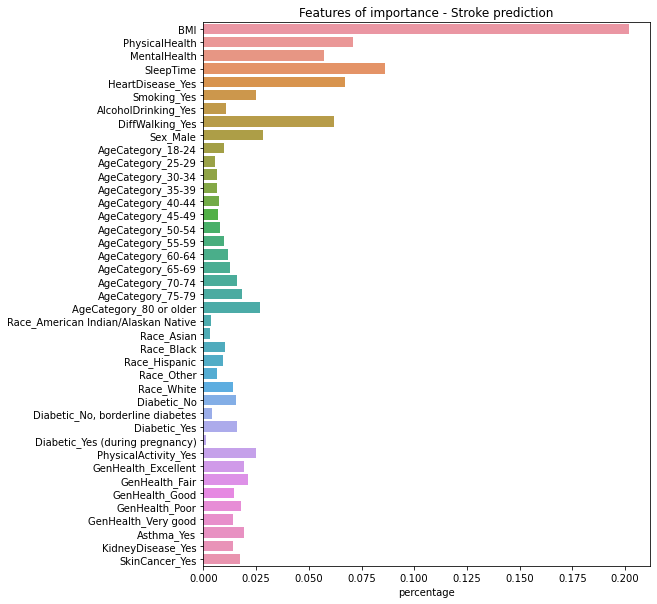

In [25]:
fig, axis = plt.subplots(figsize = (8,10))
sns.barplot(importances,feature_names)
plt.xlabel("percentage")
plt.title("Features of importance - Stroke prediction")

## Data preprocessing

In [26]:
# drop not important columns after finding out about feature of importance
df = df.drop(["Race","HeartDisease","GenHealth","Diabetic"], axis = 1)

In [27]:
# setting up dependent variable
y = df["Stroke"]

In [28]:
# encoded target column heart disease
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)


In [29]:
# encode data
data = df.drop(["Stroke"], axis = 1)
X= pd.get_dummies(data)
X.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Smoking_No',
       'Smoking_Yes', 'AlcoholDrinking_No', 'AlcoholDrinking_Yes',
       'DiffWalking_No', 'DiffWalking_Yes', 'Sex_Female', 'Sex_Male',
       'AgeCategory_18-24', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'PhysicalActivity_No',
       'PhysicalActivity_Yes', 'Asthma_No', 'Asthma_Yes', 'KidneyDisease_No',
       'KidneyDisease_Yes', 'SkinCancer_No', 'SkinCancer_Yes'],
      dtype='object')

In [30]:
# remove unnecessary columns
X = X.drop(["Sex_Female","Smoking_No","AlcoholDrinking_No","DiffWalking_No","PhysicalActivity_No","Asthma_No","KidneyDisease_No","SkinCancer_No"],axis = 1)

In [31]:
# Store column names
feature_names = X.columns
feature_names

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Smoking_Yes',
       'AlcoholDrinking_Yes', 'DiffWalking_Yes', 'Sex_Male',
       'AgeCategory_18-24', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'PhysicalActivity_Yes', 'Asthma_Yes',
       'KidneyDisease_Yes', 'SkinCancer_Yes'],
      dtype='object')

In [32]:
X.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_18-24,AgeCategory_25-29,...,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
1,20.34,0.0,0.0,7.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
22,26.17,0.0,15.0,6.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25,29.18,30.0,30.0,6.0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
35,32.98,10.0,0.0,4.0,1,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1
40,22.60,0.0,10.0,8.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [33]:
# split data into training and testing portion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

## Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=1000)

In [35]:
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [36]:
predictions = logistic.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                        target_names=["no stroke", "stroke"]))

              precision    recall  f1-score   support

   no stroke       0.72      0.73      0.72      3027
      stroke       0.73      0.71      0.72      3008

    accuracy                           0.72      6035
   macro avg       0.72      0.72      0.72      6035
weighted avg       0.72      0.72      0.72      6035



## Decision tree model

In [37]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()

In [38]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                        target_names=["no stroke", "stroke"]))

              precision    recall  f1-score   support

   no stroke       0.63      0.63      0.63      3027
      stroke       0.63      0.63      0.63      3008

    accuracy                           0.63      6035
   macro avg       0.63      0.63      0.63      6035
weighted avg       0.63      0.63      0.63      6035



## Random forest model

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50) 
rf = rf.fit(X_train,y_train)


In [41]:
predictions = rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                        target_names=["no stroke", "stroke"]))

              precision    recall  f1-score   support

   no stroke       0.70      0.66      0.68      3027
      stroke       0.68      0.72      0.70      3008

    accuracy                           0.69      6035
   macro avg       0.69      0.69      0.69      6035
weighted avg       0.69      0.69      0.69      6035



# K Neighbour model

k: 1, Train/Test Score: 0.995/0.613
k: 3, Train/Test Score: 0.810/0.635
k: 5, Train/Test Score: 0.767/0.653
k: 7, Train/Test Score: 0.749/0.661
k: 9, Train/Test Score: 0.737/0.667
k: 11, Train/Test Score: 0.729/0.665
k: 13, Train/Test Score: 0.723/0.664
k: 15, Train/Test Score: 0.719/0.665
k: 17, Train/Test Score: 0.715/0.670
k: 19, Train/Test Score: 0.715/0.670


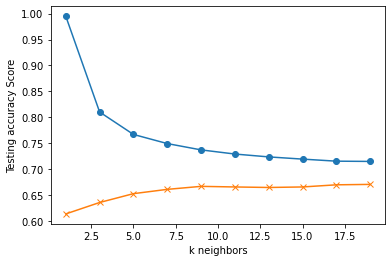

In [42]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

## SVC model

In [43]:
# Vector machine linear classifier
from sklearn.svm import SVC 
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
predictions = svc_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                        target_names=["no stroke", "stroke"]))

              precision    recall  f1-score   support

   no stroke       0.71      0.75      0.73      3027
      stroke       0.73      0.69      0.71      3008

    accuracy                           0.72      6035
   macro avg       0.72      0.72      0.72      6035
weighted avg       0.72      0.72      0.72      6035



## Chosen model: Logistic Regression Model
Reason: best F1 score on both classes, and run fast

## Save model

In [45]:
# Create pickle file
file = open('../models/LRmodel_stroke_prediction', 'wb') 

# Save the trained model to file
import pickle
pickle.dump(logistic, file)
file.close()

## Prediction

In [46]:
# load the model from disk using pickle
loaded_model = pickle.load(open('../models/LRmodel_stroke_prediction', 'rb'))

In [47]:
feature_names

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Smoking_Yes',
       'AlcoholDrinking_Yes', 'DiffWalking_Yes', 'Sex_Male',
       'AgeCategory_18-24', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'PhysicalActivity_Yes', 'Asthma_Yes',
       'KidneyDisease_Yes', 'SkinCancer_Yes'],
      dtype='object')

In [48]:
converted_input = dict.fromkeys(feature_names)

In [49]:
# Sample user's input from webpage
user_input = {
    "Height":170,
    "Weight":80,
    "PhysicalHealth":0,
    "MentalHealth":0,
    "SleepTime":7,
    "Smoking": "No",
    "AlcoholDrinking":"No",
    'DiffWalking':"No",
    'Sex':"Male",
    'Age Category':"18-24",
    'PhysicalActivity':"No",
    'Asthma':"No",
    'KidneyDisease':"No",
    'SkinCancer':"No"
    }


In [50]:
# convert user input to compatible form
converted_input["BMI"] = user_input["Weight"] / (user_input["Height"]/100)**2
converted_input["PhysicalHealth"] = user_input["PhysicalHealth"]
converted_input["MentalHealth"] = user_input["MentalHealth"]
converted_input["SleepTime"] = user_input["SleepTime"]

# set all values of the remaining keys to 0
for i in range(4,len(feature_names),1):
    key = feature_names[i]
    converted_input[key] = 0

In [51]:
# Convert boolean type input to numerical value
if user_input["Smoking"] == "Yes":
    converted_input["Smoking_Yes"] = 1

if user_input["AlcoholDrinking"] == "Yes":
    converted_input["AlcoholDrinking_Yes"] = 1

if user_input["DiffWalking"] == "Yes":
    converted_input["DiffWalking_Yes"] = 1

if user_input["Sex"] == "Yes":
    converted_input["Sex_Male"] = 1
    
if user_input["PhysicalActivity"] == "Yes":
    converted_input["PhysicalActivity_Yes"] = 1

if user_input["Asthma"] == "Yes":
    converted_input["Asthma_Yes"] = 1

if user_input["KidneyDisease"] == "Yes":
    converted_input["KidneyDisease_Yes"] = 1

if user_input["SkinCancer"] == "Yes":
    converted_input["SkinCancer_Yes"] = 1

In [52]:
# convert age category
key = "AgeCategory_" + user_input['Age Category']
converted_input[key] = 1

converted_input

{'BMI': 27.68166089965398,
 'PhysicalHealth': 0,
 'MentalHealth': 0,
 'SleepTime': 7,
 'Smoking_Yes': 0,
 'AlcoholDrinking_Yes': 0,
 'DiffWalking_Yes': 0,
 'Sex_Male': 0,
 'AgeCategory_18-24': 1,
 'AgeCategory_25-29': 0,
 'AgeCategory_30-34': 0,
 'AgeCategory_35-39': 0,
 'AgeCategory_40-44': 0,
 'AgeCategory_45-49': 0,
 'AgeCategory_50-54': 0,
 'AgeCategory_55-59': 0,
 'AgeCategory_60-64': 0,
 'AgeCategory_65-69': 0,
 'AgeCategory_70-74': 0,
 'AgeCategory_75-79': 0,
 'AgeCategory_80 or older': 0,
 'PhysicalActivity_Yes': 0,
 'Asthma_Yes': 0,
 'KidneyDisease_Yes': 0,
 'SkinCancer_Yes': 0}

In [53]:
# convert dictionary to df
input_df = pd.DataFrame(converted_input, index=[0])
input_df

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_18-24,AgeCategory_25-29,...,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,27.681661,0,0,7,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
prediction = loaded_model.predict(input_df)
if prediction[0] == 0:
    print("You have a high chance of having no stroke")
else:    
    print("You have a high chance of having a stroke")

You have a high chance of having no stroke
